## **Ejercicio 1: a) Problema de valores de contorno aproximado con diferencias finitas.**

## **Resolveremos el siguiente ejercicio utilizando discretizaciones para la derivada primera y segunda.**

\begin{equation*}
\begin{aligned}
y^{''}(x)+ \gamma \,\, y^{'}(x)+ \beta \,\, y(x) = f(x),  x \in [0,1] \\
y(0)=\alpha \\
y(1)=\eta
\end{aligned} 
\end{equation*}

Tomando $h=0.01$, $\gamma=\alpha=1$, $\beta=\eta=0$ y $f(x)=-\frac{\pi}{2}[ \sin(\frac{\pi}{2} x)+ \frac{\pi}{2} \cos (\frac{\pi}{2} x)]$.

\begin{equation*}
\left\{
\begin{aligned}
y_i \Big( \frac{1}{h^2}-\frac{3 \, \gamma}{2 \, h} + \beta \Big) + y_{i+1}  \Big( \frac{-2}{h^2} + \frac{2 \, \gamma}{h} \Big) + y_{i+2} \Big( \frac{1}{h^2} - \frac{\gamma}{2 \, h} \Big)&=f_{i} \quad (0 \leq i \leq N-2)\\
y_0 &=\alpha \\
y_N &=\eta
\end{aligned}
\right.
\end{equation*}


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def f(x):
  return np.sin(np.pi*100*x)

In [40]:
def DifFinitas(a,b,alfa,beta, gama,eta,h,f):
  N = int((b-a)/h)
  t = np.linspace(a,b,N+1)
  u = np.zeros(N-1)
  b = np.zeros(N-1)

  Ndiag = (-2/(h**2))+(2*gama/h)
  NdiagAbajo = (1/(h**2))-(3*gama/(2*h))+beta
  NdiagArriba = (1/(h**2))-(gama/(2*h))

  for i in range(0,N-1):
     b[i] = f(t[i])

  b[0] = b[0]-alfa*NdiagAbajo
  b[N-2] = b[N-2]-eta*NdiagArriba


  Diag = np.ones(N-1)*Ndiag
  DiagArriba = np.ones(N-2)*NdiagArriba
  DiagAbajo = np.ones(N-2)*NdiagAbajo


  A = np.diag(Diag)+np.diag(DiagArriba,1)+np.diag(DiagAbajo,-1)

  u = np.linalg.solve(A,b)

  return t,u,A

In [41]:
a=0
b=1
alfa=0
gama=1
beta=1
eta=1
h=0.01

In [42]:
t,Solucion,Matriz=DifFinitas(a,b,alfa,beta, gama,eta,h,f)
print(Solucion)

[0.01868287 0.03717796 0.0554853  0.07360491 0.09153684 0.10928115
 0.12683792 0.14420727 0.16138929 0.17838415 0.19519197 0.21181295
 0.22824727 0.24449513 0.26055675 0.27643238 0.29212227 0.30762668
 0.32294592 0.33808028 0.35303007 0.36779564 0.38237733 0.39677551
 0.41099055 0.42502285 0.43887281 0.45254087 0.46602745 0.479333
 0.49245799 0.5054029  0.51816822 0.53075445 0.5431621  0.55539171
 0.56744383 0.579319   0.59101779 0.60254078 0.61388856 0.62506174
 0.63606093 0.64688675 0.65753985 0.66802087 0.67833046 0.6884693
 0.69843807 0.70823746 0.71786817 0.72733091 0.73662639 0.74575536
 0.75471855 0.7635167  0.77215058 0.78062095 0.78892858 0.79707427
 0.80505881 0.81288299 0.82054762 0.82805352 0.83540153 0.84259246
 0.84962716 0.85650648 0.86323127 0.86980239 0.87622071 0.88248711
 0.88860247 0.89456768 0.90038363 0.90605122 0.91157135 0.91694495
 0.92217293 0.92725621 0.93219572 0.9369924  0.94164718 0.94616101
 0.95053483 0.95476961 0.95886629 0.96282585 0.96664924 0.9703374

## **A la solución debo agregarle los bordes que eran datos**

In [43]:
SolucionBD=np.append( Solucion,eta)
print(SolucionBD)

[0.01868287 0.03717796 0.0554853  0.07360491 0.09153684 0.10928115
 0.12683792 0.14420727 0.16138929 0.17838415 0.19519197 0.21181295
 0.22824727 0.24449513 0.26055675 0.27643238 0.29212227 0.30762668
 0.32294592 0.33808028 0.35303007 0.36779564 0.38237733 0.39677551
 0.41099055 0.42502285 0.43887281 0.45254087 0.46602745 0.479333
 0.49245799 0.5054029  0.51816822 0.53075445 0.5431621  0.55539171
 0.56744383 0.579319   0.59101779 0.60254078 0.61388856 0.62506174
 0.63606093 0.64688675 0.65753985 0.66802087 0.67833046 0.6884693
 0.69843807 0.70823746 0.71786817 0.72733091 0.73662639 0.74575536
 0.75471855 0.7635167  0.77215058 0.78062095 0.78892858 0.79707427
 0.80505881 0.81288299 0.82054762 0.82805352 0.83540153 0.84259246
 0.84962716 0.85650648 0.86323127 0.86980239 0.87622071 0.88248711
 0.88860247 0.89456768 0.90038363 0.90605122 0.91157135 0.91694495
 0.92217293 0.92725621 0.93219572 0.9369924  0.94164718 0.94616101
 0.95053483 0.95476961 0.95886629 0.96282585 0.96664924 0.9703374

In [44]:
SolucionBIBD=np.append(alfa,SolucionBD )
print(SolucionBIBD)

[0.         0.01868287 0.03717796 0.0554853  0.07360491 0.09153684
 0.10928115 0.12683792 0.14420727 0.16138929 0.17838415 0.19519197
 0.21181295 0.22824727 0.24449513 0.26055675 0.27643238 0.29212227
 0.30762668 0.32294592 0.33808028 0.35303007 0.36779564 0.38237733
 0.39677551 0.41099055 0.42502285 0.43887281 0.45254087 0.46602745
 0.479333   0.49245799 0.5054029  0.51816822 0.53075445 0.5431621
 0.55539171 0.56744383 0.579319   0.59101779 0.60254078 0.61388856
 0.62506174 0.63606093 0.64688675 0.65753985 0.66802087 0.67833046
 0.6884693  0.69843807 0.70823746 0.71786817 0.72733091 0.73662639
 0.74575536 0.75471855 0.7635167  0.77215058 0.78062095 0.78892858
 0.79707427 0.80505881 0.81288299 0.82054762 0.82805352 0.83540153
 0.84259246 0.84962716 0.85650648 0.86323127 0.86980239 0.87622071
 0.88248711 0.88860247 0.89456768 0.90038363 0.90605122 0.91157135
 0.91694495 0.92217293 0.92725621 0.93219572 0.9369924  0.94164718
 0.94616101 0.95053483 0.95476961 0.95886629 0.96282585 0.96664

## **Ahora sí puedo graficar pues t y la solución tienen igual dimensión.**

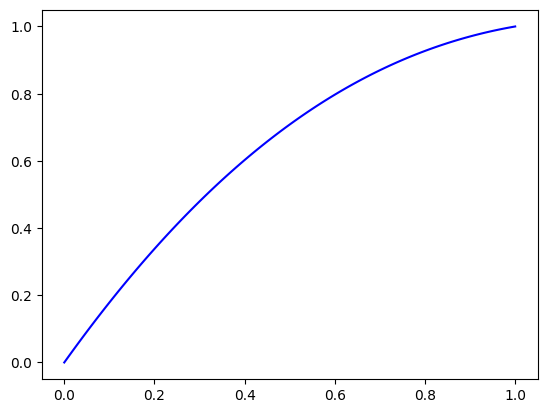

In [45]:
plt.plot(t,SolucionBIBD,'b')

## **Dibujo la exacta para comparar**

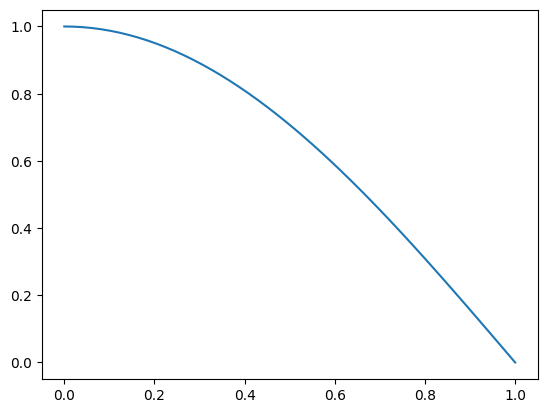

In [46]:
x=np.linspace(0,1,50)
plt.plot(x,np.cos(0.5*np.pi*x))